In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
signs = pd.read_csv('signnames.csv')

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(signs)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


1


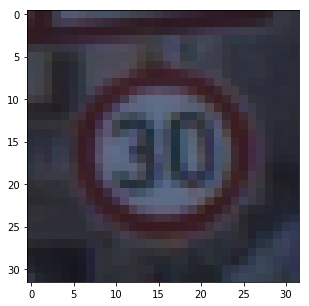

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize = (5,5))
plt.imshow(image,cmap="gray")
print(y_train[index])

### Pre-process the Data Set (normalization, grayscale, etc.)

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [7]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def TrafficSign(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 14x14x12 Output = 12x12x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 12x12x24. Output = 7x7x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 3: Convolutional. Input = 7x7x24 Output = 5x5x48.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 24, 48), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(48))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 5x5x48. Output = 2x2x48.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 2x2x48. Output = 192.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 192. Output = 96.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(192, 96), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(96))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(fc1, 0.7)
    # SOLUTION: Layer 4: Fully Connected. Input = 96. Output = 48.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(96, 48), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(48))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    #keep_prob = tf.placeholder(tf.float32)

    #fc2 = tf.nn.dropout(fc2, 0.5)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 48. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(48, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [11]:
rate = 0.001

logits = TrafficSign(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.676

EPOCH 2 ...
Validation Accuracy = 0.796

EPOCH 3 ...
Validation Accuracy = 0.844

EPOCH 4 ...
Validation Accuracy = 0.823

EPOCH 5 ...
Validation Accuracy = 0.850

EPOCH 6 ...
Validation Accuracy = 0.868

EPOCH 7 ...
Validation Accuracy = 0.883

EPOCH 8 ...
Validation Accuracy = 0.896

EPOCH 9 ...
Validation Accuracy = 0.909

EPOCH 10 ...
Validation Accuracy = 0.898

Model saved


In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\traffic_sign
Test Accuracy = 0.892


### Load and Output the Images

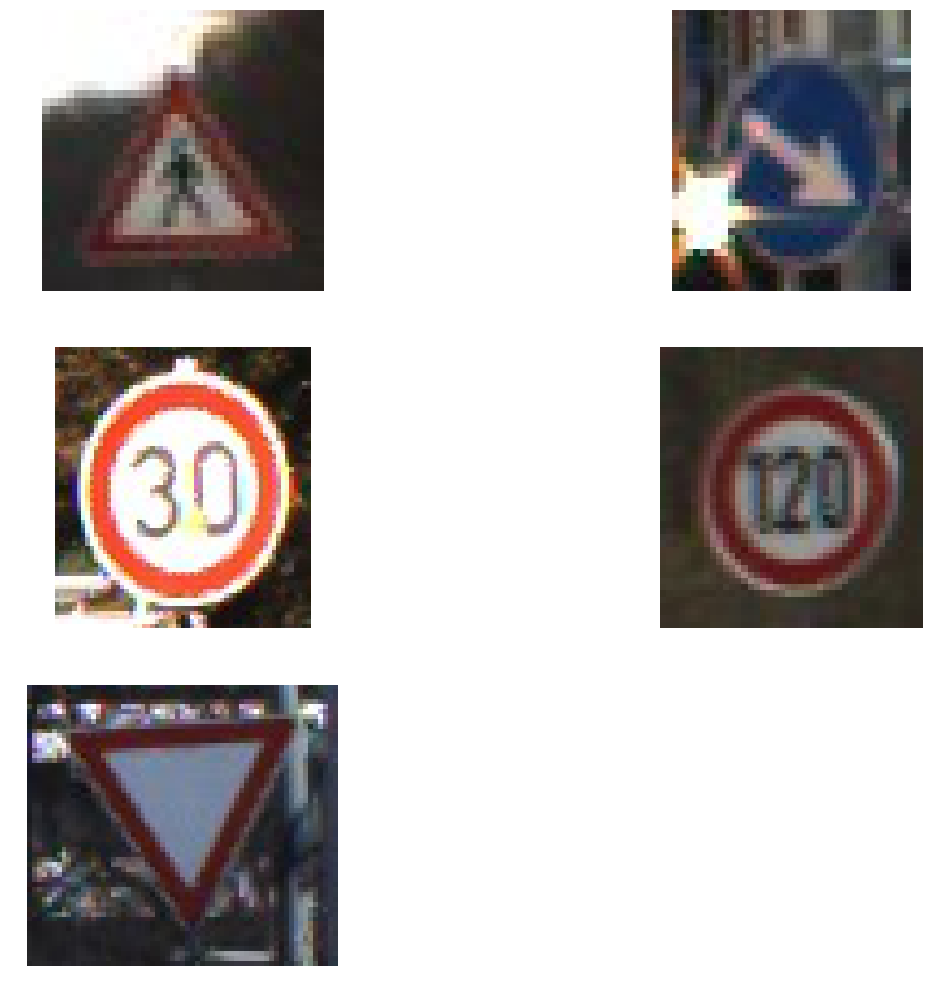

In [17]:


from PIL import Image
from scipy import misc
import os
import matplotlib.pyplot as plt

new_images_folder = './test_images/'
listing = os.listdir(new_images_folder)
truth_labels = [27,38,1,8,13]
fig = plt.figure(figsize=(20,30))
sess = tf.Session()

for i, file in enumerate(listing):
    actual_new_image = Image.open(new_images_folder + file)
    #new_image = actual_new_image.convert('L')
    new_image = actual_new_image.resize((32,32))
    new_image.load()
    new_image = np.asarray(new_image).reshape(1,32,32,3)
    
    
    
    plt.subplot(5,2,1+i)
    plt.axis('off')
   # truth= signs[str(truth_labels[i])]
   # color = 'green' if truth == new_predicted_label else 'red'
   # plt.text(40,10,"Truth:              {0}\nPrediction: {1}\n".format(truth, new_predicted_label), fontsize=10, color=color)
    plt.imshow(actual_new_image)
plt.show()

### Predict the Sign Type for Each Image

In [45]:

def run_inference(image_files):
    """
    Load trained model and run inference on images
    Arguments:
        * images: Array of images on which to run inference
    Returns:
            * Array of strings, representing the model's predictions
    """
    # Read image files, resize them, convert to numpy arrays w/ dtype=uint8
    
    listing = os.listdir(image_files)
    truth_labels = [27,38,1,8,13]
    fig = plt.figure(figsize=(20,30))
    sess = tf.Session()
    X_test_new = []
    j = 0
    for i, file in enumerate(listing):
        actual_new_image = Image.open(new_images_folder + file)
        new_image = actual_new_image.resize((32,32))
        new_image.load()
        new_image = np.asarray(new_image).reshape(1,32,32,3)        
        X_test_new.append(new_image)
       
    X_test_new = np.array(X_test_new)
    X_test_new = np.asarray(X_test_new).reshape(5,32,32,3)
    
    
    with tf.Graph().as_default(), tf.Session() as sess:
    
        # Load trained weights
        #saver = tf.train.Saver()
        #saver.restore(sess, traffic_sign)
        
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        
        # Run inference on CNN to make predictions
        preds = sess.run(TrafficSign, feed_dict={x: X_test_new})

    # Load signnames.csv to map label number to sign string
    label_map = {}
    with open('signnames.csv', 'r') as f:
        first_line = True
        for line in f:
            # Ignore first line
            if first_line:
                first_line = False
                continue

            # Populate label_map
            label_int, label_string = line.split(',')
            label_int = int(label_int)

            label_map[label_int] = label_string

    final_preds = [label_map[pred] for pred in preds]

    return final_preds

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [38]:
logits = TrafficSign(x)
softmax = tf.nn.softmax(logits)


sess2 = tf.get_default_session()

with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_new, truth_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    result = sess2.run(softmax, feed_dict={x: X_test_new})
    values, indices = tf.nn.top_k(result, 5)
    
    predictions  = sess2.run(values)
    predictionIndicies  = sess2.run(indices)
    print("predictions")
    print(predictions)
    print("predictionIndicies")
    print(predictionIndicies)

INFO:tensorflow:Restoring parameters from .\traffic_sign
Test Accuracy = 1.000
predictions
[[  9.99893188e-01   1.06769279e-04   6.84768284e-11   2.60361309e-14
    1.84295565e-14]
 [  9.93787527e-01   6.21201005e-03   4.52515081e-07   7.85226177e-08
    5.88572657e-09]
 [  1.00000000e+00   2.15947726e-09   3.55383854e-15   3.40468626e-19
    1.81932017e-19]
 [  9.99614596e-01   3.84957588e-04   3.59011096e-07   8.78588793e-08
    1.32830618e-08]
 [  9.99527216e-01   4.72760672e-04   3.23892890e-09   1.98167344e-10
    2.33541277e-11]]
predictionIndicies
[[38 19  8  9 40]
 [38 19  8 13 40]
 [38 19  8  5 25]
 [38 19  8 25 13]
 [38 19  8 22  9]]
